## 01: Pré-Processamento


In [13]:
# !pip install -U numpy==1.18.5

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
passageiros

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

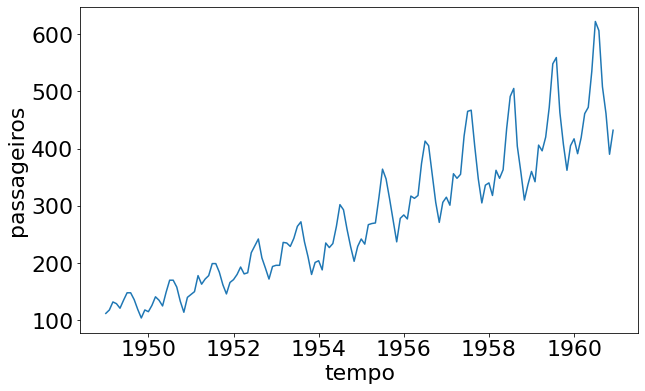

In [16]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

sns.lineplot(x="tempo", y="passageiros", data=passageiros)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(passageiros)
dado_escalado = sc.transform(passageiros)
x = dado_escalado[:, 0]
y = dado_escalado[:, 1]


Text(0.5, 0, 'Data')

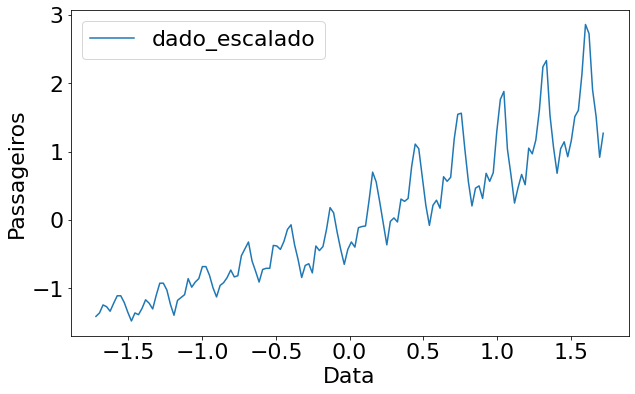

In [18]:
import matplotlib.pyplot as plt

sns.lineplot(x=x, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

<AxesSubplot:>

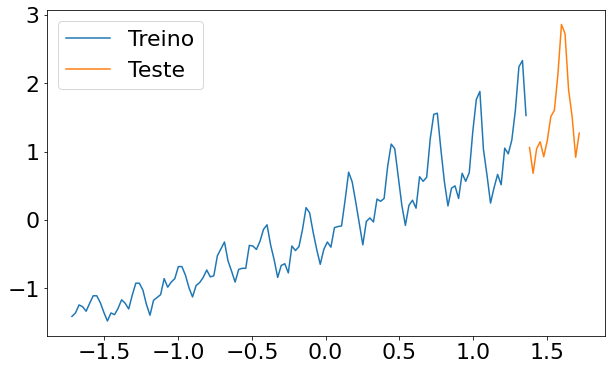

In [19]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

xtreino = x[:tamanho_treino]
ytreino = y[:tamanho_treino]

xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

sns.lineplot(x=xtreino, y=ytreino, label='Treino')
sns.lineplot(x=xteste, y=yteste, label='Teste')

## 02: Regressão

![](https://caelum-online-public.s3.amazonaws.com/366+-+Deep+Learning%3A+Previs%C3%A3o+com+Keras/Aula2_video1_imagem1+%282%29.png)

In [20]:
import tensorflow as tf

tf.__version__

'2.8.0'

In [21]:
from tensorflow import keras

In [22]:
from keras.models import Sequential
from keras.layers import Dense

regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', 
                    use_bias=False, activation='linear'))



In [23]:
regressor.compile(loss='mean_squared_error', optimizer='Adam')


In [24]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [25]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1284


<AxesSubplot:>

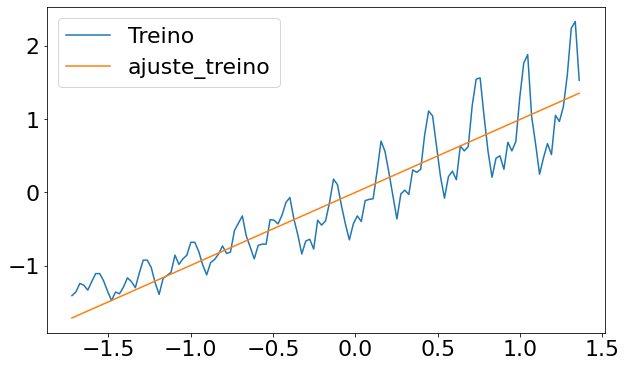

In [26]:
y_predict = regressor.predict(xtreino)
sns.lineplot(x=xtreino, y=ytreino, label='Treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

In [27]:
import numpy as np

y_predict.ndim

2

In [28]:
d = {'tempo':xtreino, 'passaageiros':y_predict[:,0]}

In [29]:
resultados = pd.DataFrame(data=d)
resultados

,tempo,passaageiros
0,-1.720064,-1.711966
1,-1.696007,-1.688022
2,-1.671950,-1.664079
3,-1.647894,-1.640135
4,-1.623837,-1.616192
...,...,...
124,1.262984,1.257038
125,1.287041,1.280982
126,1.311098,1.304925
127,1.335155,1.328869


In [30]:
resultado_trans = sc.inverse_transform(resultados)
resultado_trans = pd.DataFrame(resultado_trans, columns=['tempo', 'passageiros'])
resultado_trans

,tempo,passageiros
0,1949.000000,75.634712
1,1949.083333,78.497140
2,1949.166667,81.359582
3,1949.250000,84.222009
4,1949.333333,87.084451
...,...,...
124,1959.333333,430.576299
125,1959.416667,433.438741
126,1959.500000,436.301168
127,1959.583333,439.163582


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

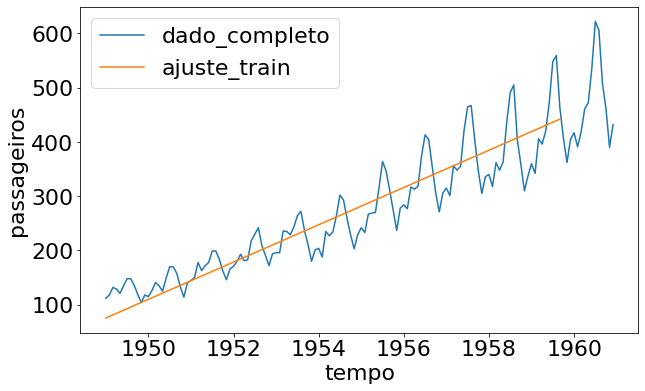

In [31]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_trans, label='ajuste_train')

In [32]:
y_predict_teste = regressor.predict(xteste)
d = {'tempo':xteste, 'passageiros':y_predict_teste[:,0]}

resultado_teste = pd.DataFrame(data=d)
resultado_transf_teste = sc.inverse_transform(resultado_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste, columns=['tempo', 'passageiros'])
resultado_transf_teste


,tempo,passageiros
0,1959.750000,444.888451
1,1959.833333,447.750893
2,1959.916667,450.613321
3,1960.000000,453.475749
4,1960.083333,456.338191
5,1960.166667,459.200618
6,1960.250000,462.063060
7,1960.333333,464.925474
8,1960.416667,467.787901
9,1960.500000,470.650343


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

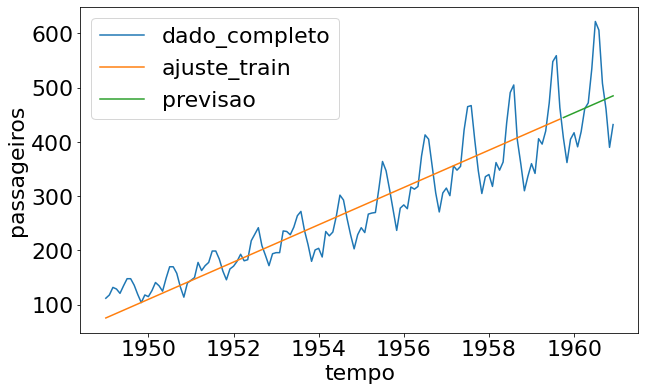

In [33]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_trans, label='ajuste_train')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsao')


In [34]:
regressor2 = Sequential()

regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [36]:
regressor2.fit(xtreino, ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8412
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8321
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8267
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8204
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8169
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8156
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8146
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8126
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8102
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8067
Epoch 11/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8054
Epoch 12/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8046
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

In [37]:
y_predict= regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)
y_predict_teste= regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

<AxesSubplot:>

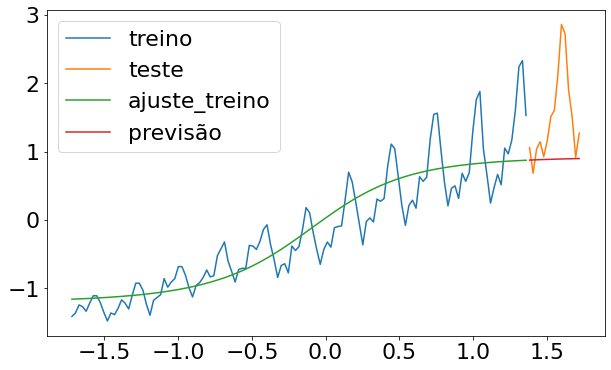

In [38]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

## 03: Reformulando o problema

In [39]:
vetor = pd.DataFrame(ytreino)[0]

In [40]:
import numpy as np

def separa_dados(vetor, n_passos):
    X_novo, y_novo = [], []
    
    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos: i-1]))
        y_novo.append(vetor.loc[i])
        
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    
    return X_novo, y_novo

In [64]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [30]:
xtreino_novo[:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [31]:
ytreino_novo[:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [32]:
vetor2 = pd.DataFrame(yteste)[0]

In [33]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [ ]:
regressor3 = Sequential()

regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', 
                     activation='linear', use_bias=False))

regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))


In [ ]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1000us/step - loss: 0.7620
Epoch 2/100
4/4 [==============================] - 0s 799us/step - loss: 0.7399
Epoch 3/100
4/4 [==============================] - 0s 797us/step - loss: 0.7189
Epoch 4/100
4/4 [==============================] - 0s 774us/step - loss: 0.6976
Epoch 5/100
4/4 [==============================] - 0s 818us/step - loss: 0.6742
Epoch 6/100
4/4 [==============================] - 0s 602us/step - loss: 0.6533
Epoch 7/100
4/4 [==============================] - 0s 864us/step - loss: 0.6272
Epoch 8/100
4/4 [==============================] - 0s 762us/step - loss: 0.6019
Epoch 9/100
4/4 [==============================] - 0s 610us/step - loss: 0.5724
Epoch 10/100
4/4 [==============================] - 0s 720us/step - loss: 0.5388
Epoch 11/100
4/4 [==============================] - 0s 750us/step - loss: 0.5042
Epoch 12/100
4/4 [==============================] - 0s 744us/step - loss: 0.4693
Epoch 13/100
4/4 [==================

In [ ]:
y_predict_novo = regressor3.predict(xtreino_novo)

<AxesSubplot:xlabel='tempo', ylabel='0'>

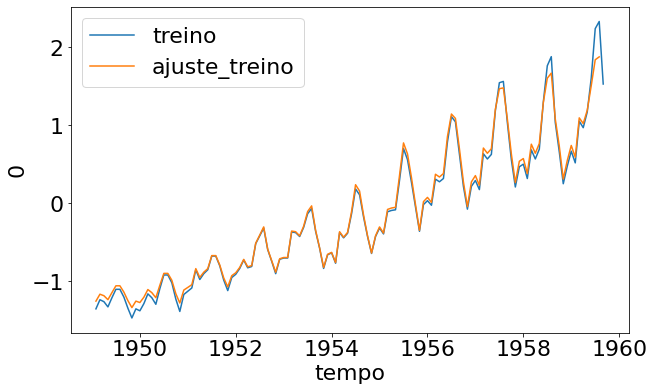

In [37]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [38]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [39]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

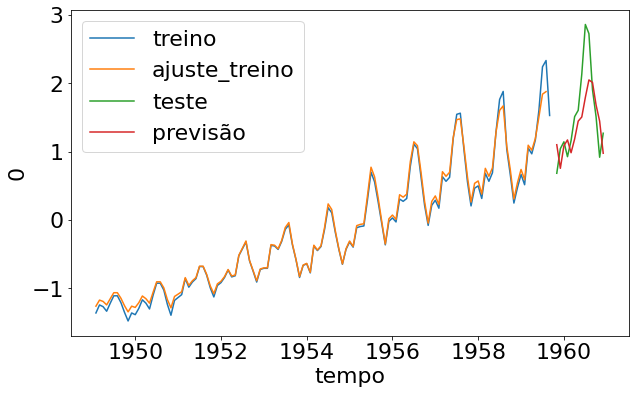

In [40]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão')


In [41]:
xtreino_novo , ytreino_novo = separa_dados(vetor, 4)

In [42]:
xtreino_novo[:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [43]:
ytreino_novo[:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [44]:
xteste_novo, yteste_novo = separa_dados(vetor2, 4)

In [45]:
regressor4 = Sequential()

regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones', 
                     activation='linear', use_bias=False))

regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))


In [46]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [47]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7775
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 0.6879
Epoch 3/300
4/4 [==============================] - 0s 998us/step - loss: 0.6164
Epoch 4/300
4/4 [==============================] - 0s 750us/step - loss: 0.5459
Epoch 5/300
4/4 [==============================] - 0s 886us/step - loss: 0.4791
Epoch 6/300
4/4 [==============================] - 0s 740us/step - loss: 0.4165
Epoch 7/300
4/4 [==============================] - 0s 727us/step - loss: 0.3537
Epoch 8/300
4/4 [==============================] - 0s 713us/step - loss: 0.3012
Epoch 9/300
4/4 [==============================] - 0s 750us/step - loss: 0.2541
Epoch 10/300
4/4 [==============================] - 0s 893us/step - loss: 0.2127
Epoch 11/300
4/4 [==============================] - 0s 751us/step - loss: 0.1803
Epoch 12/300
4/4 [==============================] - 0s 687us/step - loss: 0.1640
Epoch 13/300
4/4 [=======================

In [48]:
ypredict_novo = regressor4.predict(xtreino_novo)

In [49]:
ypredict_teste_novo = regressor4.predict(xteste_novo)

In [50]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [51]:
resultado = pd.DataFrame(ypredict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

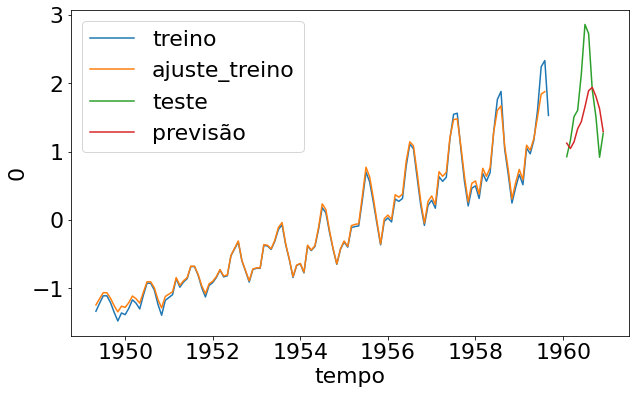

In [52]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

## 04: Redes recorrentes:

In [53]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [54]:
bike['datas'] = pd.to_datetime(bike['datas'])
bike

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


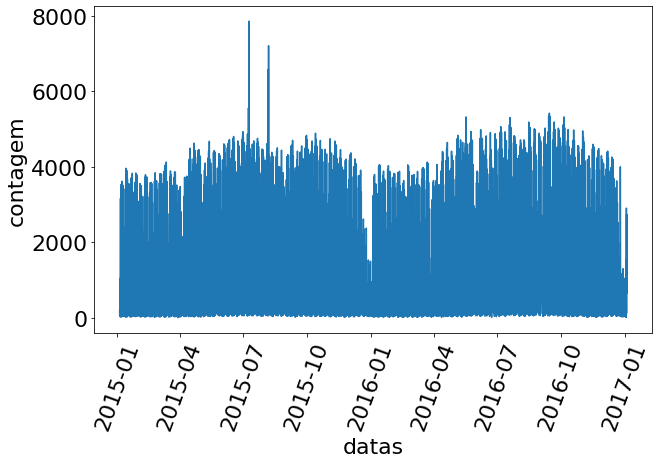

In [55]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)
plt.show()

In [56]:
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))


StandardScaler()

In [57]:
y = sc2.transform(bike['contagem'].values.reshape(-1, 1))

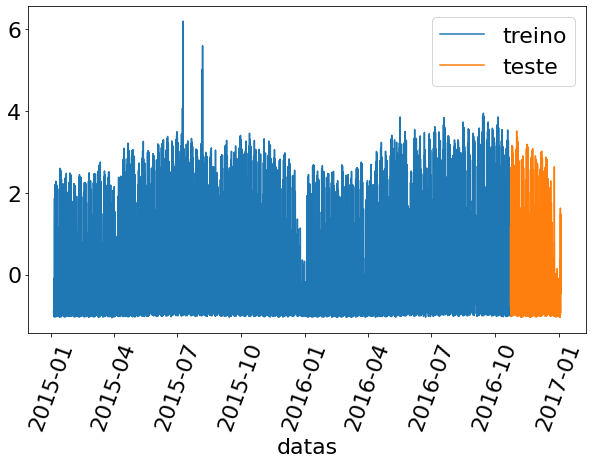

In [58]:
tamanho_treino = int(len(bike)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(bike)-tamanho_treino #O resto vamos reservar para teste

ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino') 
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
plt.xticks(rotation=70)
plt.show()


In [59]:
vetor = pd.DataFrame(ytreino)[0]

In [60]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [61]:
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [62]:
vetor2 = pd.DataFrame(yteste)[0]

In [63]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

![](https://i.imgur.com/WB1VDlG.png)

![](https://i.imgur.com/Pw0GNUn.png)

In [64]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [65]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [66]:
!pip install numpy==0.

ERROR: Could not find a version that satisfies the requirement numpy==0. (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0rc1, 1.13.0rc2, 1.13.0, 1.13.1, 1.13.3, 1.14.0rc1, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0rc1, 1.15.0rc2, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0rc1, 1.16.0rc2, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0rc1, 1.17.0rc2, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0rc1, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0rc1, 1.19.0rc2, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0rc1, 1.20.0rc2, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0rc1, 1.21.0rc2, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.22.0rc1, 1.22.0rc2, 1.22.0rc3, 1.22.0)
ERROR: No matching distribution found for numpy==0.


[link](https://exerror.com/notimplementederror-cannot-convert-a-symbolic-tensor-lstm_2-strided_slice0-to-a-numpy-array/) do problema

In [67]:
from tensorflow.keras.layers import LSTM
recorrente = Sequential()

recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [68]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [69]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

Escolhemos a LSTM ou Long Short Term Memory como opção de rede neural recorrente. Long Short Term Memory significa memória de longo prazo, e ela é importante, porque em séries muito longas, uma rede neural recorrente comum não consegue lidar muito bem com essas séries muito longas, não enxergando muito bem os padrões que aparecem lá atrás na série.

Outro ponto importante nas redes recorrentes, é a atualização dos pesos, como nós podemos ter muitas camadas escondidas e muitos loops em cada uma das camadas, conforme nós vamos atualizando os pesos por conta do caráter sequencial da série, cada vez nós vamos voltando na série e atualizando menos os pesos, e isso é um problema, porque a atualização dos pesos é importante para que a rede aprenda. O nome dessa atualização dos pesos se esvaindo, digamos assim, é vanishing gradient, ou o gradiente se esvaindo.

Uma forma de lidar com esse problema, é inicializando os pesos com uma distribuição adequada como a glorot uniform ou a glorot normal, mas no keras, a glorot uniform já é a inicialização dos pesos utilizados por padrão, então, não precisamos nos preocupar com esse problema.



In [70]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 8s 16ms/step - loss: 0.2721 - val_loss: 0.0848
Epoch 2/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0742 - val_loss: 0.0487
Epoch 3/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0543 - val_loss: 0.0292
Epoch 4/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0455 - val_loss: 0.0314
Epoch 5/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0423 - val_loss: 0.0294
Epoch 6/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0387 - val_loss: 0.0246
Epoch 7/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0373 - val_loss: 0.0252
Epoch 8/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0354 - val_loss: 0.0225
Epoch 9/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0340 - val_loss: 0.0206
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0324 

In [71]:
y_ajustado = recorrente.predict(xtreino_novo)

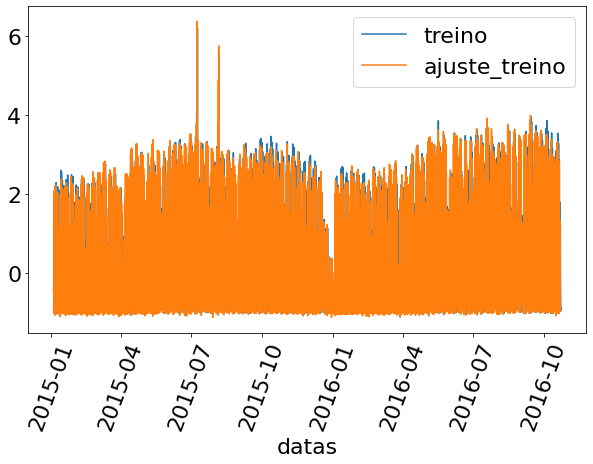

In [75]:
sns.lineplot(x='datas', y=ytreino[:, 0], data=bike[:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:, 0], data=bike[:15662], label='ajuste_treino')
plt.xticks(rotation=70)
plt.show()

In [74]:
y_predito = recorrente.predict(xteste_novo)


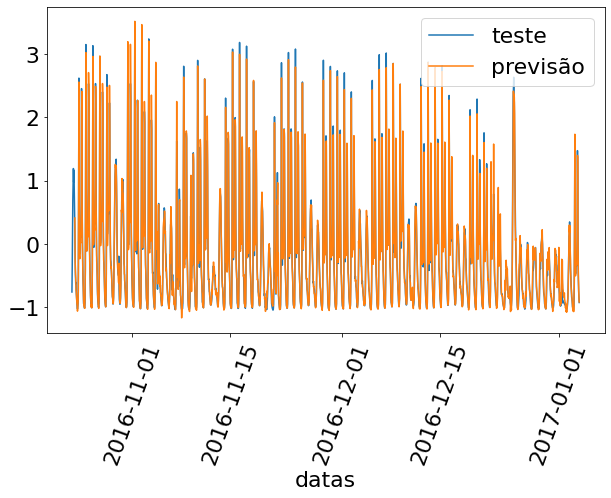

In [76]:
sns.lineplot(x='datas', y=yteste[:, 0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito[:, 0], data=bike[tamanho_treino+10:len(bike)], label='previsão')
plt.xticks(rotation=70)
plt.show()

In [77]:
from tensorflow.keras.layers import GRU

recorrente_g = Sequential()
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [78]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [79]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [80]:
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [81]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 6s 13ms/step - loss: 0.2101 - val_loss: 0.0632
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0674 - val_loss: 0.0528
Epoch 3/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0505 - val_loss: 0.0420
Epoch 4/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0421 - val_loss: 0.0353
Epoch 5/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0383 - val_loss: 0.0309
Epoch 6/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0360 - val_loss: 0.0276
Epoch 7/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0342 - val_loss: 0.0269
Epoch 8/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0328 - val_loss: 0.0245
Epoch 9/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0318 - val_loss: 0.0219
Epoch 10/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0312 - v

In [83]:
y_predito2 = recorrente_g.predict(xteste_novo)

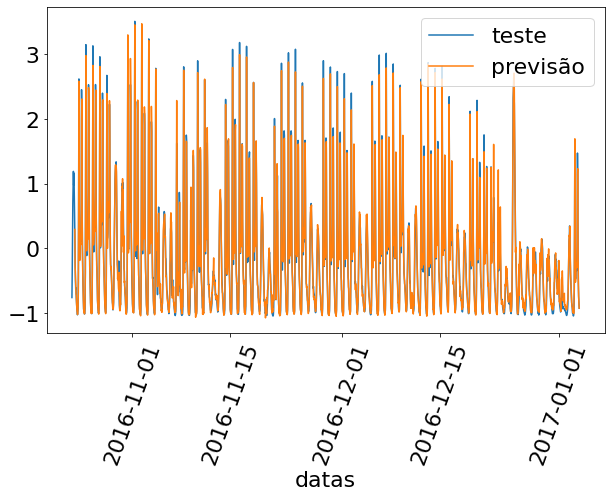

In [84]:
sns.lineplot(x='datas', y=yteste[:, 0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito2[:, 0], data=bike[tamanho_treino+10:len(bike)], label='previsão')
plt.xticks(rotation=70)
plt.show()

In [85]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


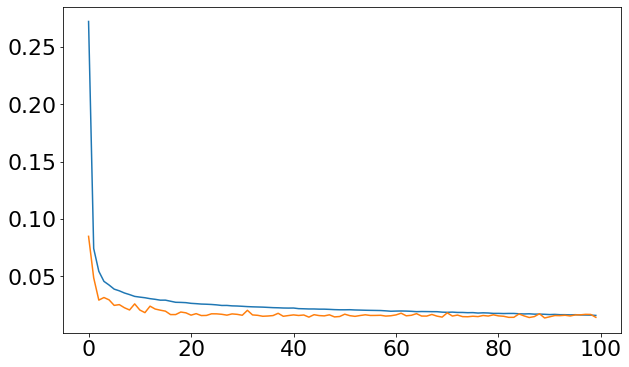

In [86]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])

Text(0, 0.5, 'Custo')

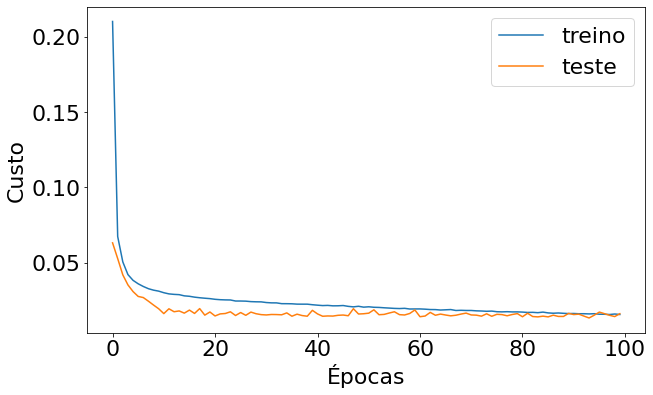

In [89]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')